In [1]:
import pandas as pd
import numpy as np

# Create a DataFrame with 1000 rows and 4 columns
df = pd.DataFrame({
    'X1': np.random.randint(-100, 501, size=1000),
    'X2': np.random.uniform(0, 1, size=1000),
    'X3': np.random.randint(0, 10, size=1000)
})

# Calculate the fourth column 'Y' using the given formula
df['Y'] = 5 * df['X1'] + 100 * df['X2'] - df['X3'] ** 2

df.head()

,X1,X2,X3,Y
0,385,0.525017,1,1976.501653
1,500,0.120881,1,2511.088094
2,287,0.021605,0,1437.160453
3,151,0.416107,6,760.610696
4,362,0.494657,6,1823.465728


In [2]:
df.to_csv('data.csv', index=False)

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_excel('Donnees.xlsx')
X = data.drop('y', axis=1)
y = data['y']
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [7]:
print(X_scaled.shape, y_scaled.ravel().shape)
print(y_train.flatten().shape, y_test.flatten().shape)

(500, 3) (500,)
(400,) (100,)


In [8]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [9]:
y_pred = model.predict(X_test)
y_test_inv = y_scaler.inverse_transform(y_test)
y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

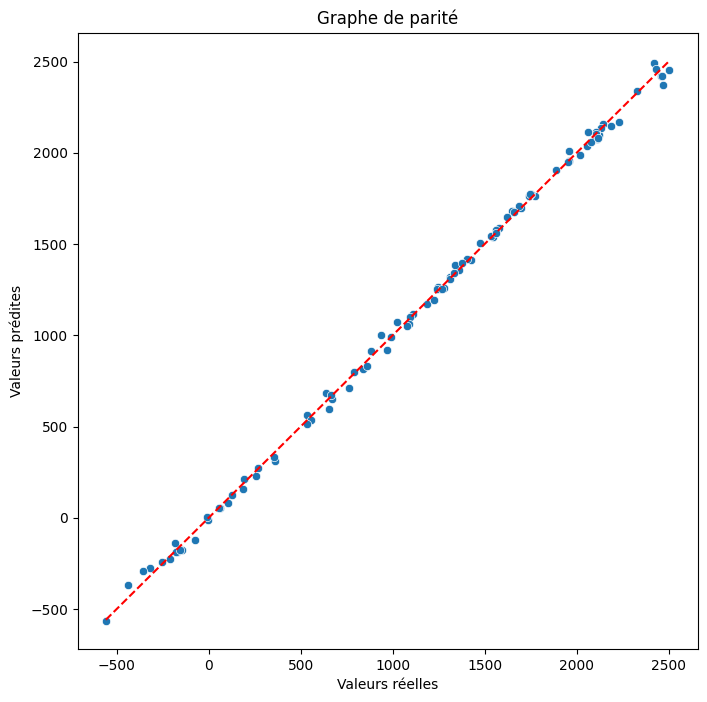

In [10]:
# Tracer le graphe de parité
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test_inv.flatten(), y=y_pred_inv.flatten())
# Tracer la ligne y = x pour référence
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red', linestyle='--')

        # Ajouter les labels et le titre
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphe de parité')

plt.show()

In [11]:
data_2 = pd.read_excel('data_multi_outputs.xlsx')
X = data_2.drop(['y1', 'y2','y3','y4'], axis=1)
y = data_2[['y1', 'y2','y3','y4']]
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [12]:
model_2 = MLPRegressor(hidden_layer_sizes=(100, 100),
                        max_iter=1000,
                        random_state=42)
model_2.fit(X_train_scaled, y_train_scaled)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [13]:
pred = model_2.predict(X_test_scaled)

In [14]:
pred.shape

(200, 4)

In [15]:
pred_inv = y_scaler.inverse_transform(pred)

In [16]:
pred_inv.shape

(200, 4)

In [17]:
pred_inv

array([[ 1.11798955e+01,  4.42197320e+01,  2.61194383e+02,
         1.57193348e+02],
       [ 2.89772979e+00,  7.91713701e+01,  4.70943551e+02,
         7.10192313e+02],
       [ 5.98815712e+00,  3.92318931e+01,  6.50381862e+02,
         2.46498138e+02],
       [-2.98937825e-01,  5.77390791e+01,  2.90275060e+02,
         4.13654313e+02],
       [ 1.02139074e+01,  2.08346244e+01,  5.18240886e+02,
         1.78681715e+01],
       [ 4.78481518e-01,  4.29266835e+01,  5.95958707e+02,
         2.62266672e+02],
       [ 8.00006021e+00,  1.84748511e+01,  3.75223861e+02,
         5.24843295e+01],
       [-3.53269755e+00,  7.11569465e+01,  7.81143838e+02,
         4.71151902e+02],
       [ 3.64592814e+00,  8.44527241e+01,  8.60552569e+02,
         7.85420128e+02],
       [-3.19801155e+00,  9.09789756e+00,  5.33679361e+02,
        -8.26280987e+00],
       [ 7.94176919e+00,  1.48529554e+01,  4.62355042e+02,
         3.28904477e+01],
       [ 1.15555138e+01,  7.64204544e+01,  3.43756242e+02,
      

In [18]:
y_test_inv = y_scaler.inverse_transform(y_test_scaled)

In [19]:
y_test_inv

array([[ 1.11766543e+01,  4.55857794e+01,  2.68000000e+02,
         1.60505022e+02],
       [ 2.86164010e+00,  7.59016725e+01,  4.80000000e+02,
         6.69916597e+02],
       [ 5.94576380e+00,  4.25923685e+01,  6.35000000e+02,
         2.63363521e+02],
       [-1.27044565e-01,  5.60991759e+01,  3.05000000e+02,
         4.00340833e+02],
       [ 1.02359180e+01,  1.86810367e+01,  5.14000000e+02,
         1.55861529e+01],
       [ 4.70268550e-01,  4.37687541e+01,  5.97000000e+02,
         2.80328107e+02],
       [ 8.04819067e+00,  1.82315019e+01,  3.78000000e+02,
         4.42900802e+01],
       [-3.55212438e+00,  6.80365936e+01,  7.84000000e+02,
         4.41357930e+02],
       [ 3.72911419e+00,  8.42822847e+01,  8.62000000e+02,
         7.81100601e+02],
       [-3.15997114e+00,  9.77564426e+00,  5.37000000e+02,
         6.93528370e-01],
       [ 8.07827003e+00,  1.33824657e+01,  4.65000000e+02,
         2.08974095e+01],
       [ 1.15629774e+01,  7.70290068e+01,  3.50000000e+02,
      

In [20]:
pred_inv[:, 0]

array([11.17989552,  2.89772979,  5.98815712, -0.29893783, 10.21390741,
        0.47848152,  8.00006021, -3.53269755,  3.64592814, -3.19801155,
        7.94176919, 11.55551378, -6.4297421 ,  7.60066923,  0.34256411,
       -4.48710756,  2.00827358, -1.02807939, -6.31134101,  0.47179122,
       -1.46773969,  9.79336038, -1.45241471, 11.22396065, -3.48369354,
       -5.58563161,  1.80755674, 10.54846397,  4.35308065,  0.36473006,
        7.40749847, -2.63941191,  4.08530982,  7.37042984,  9.14543529,
        8.89857667,  7.71660853, -0.5054552 , 11.30380205, 12.33067623,
        0.61250752, -3.07828895, -4.84777898,  3.27792245, -7.18108668,
        3.16398822,  1.61337719, -0.31648405, -1.54037815, 11.43011017,
       10.7449152 ,  2.98355684,  0.60205711,  9.0775932 ,  5.12551417,
        8.07592269,  0.22885172, 10.71508746, -5.14640179, 10.98116061,
        7.47052121,  0.91680806, 10.36088418, 10.27378473,  8.88840423,
       11.21932491, -0.87356772, -5.20443725,  8.15330152, -4.36

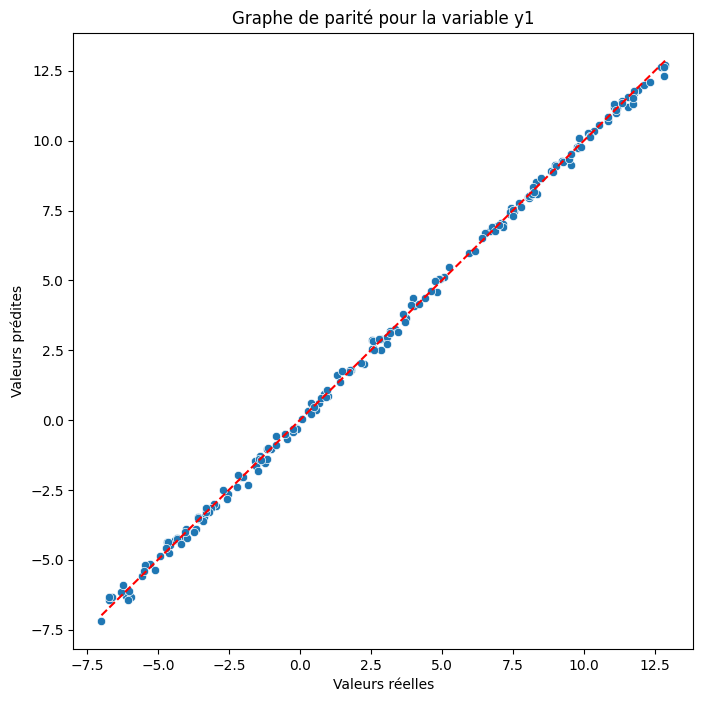

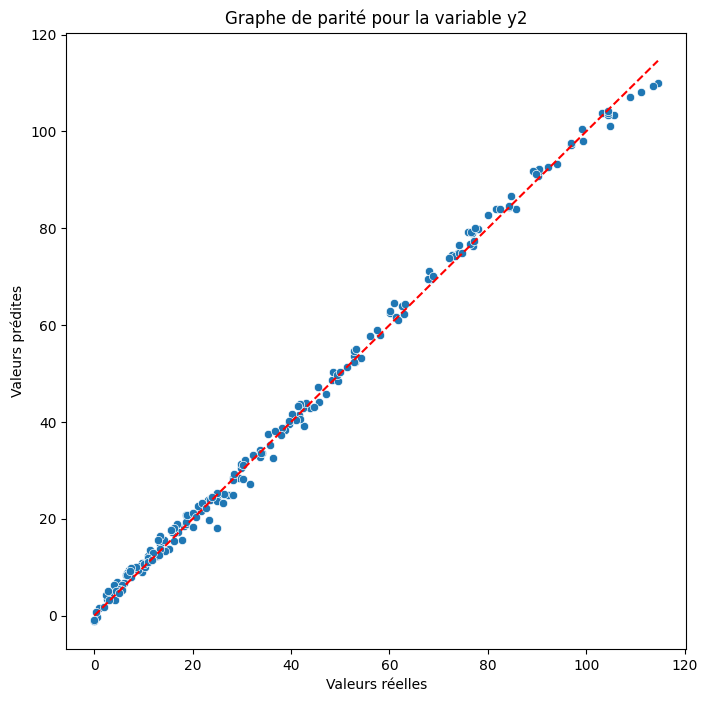

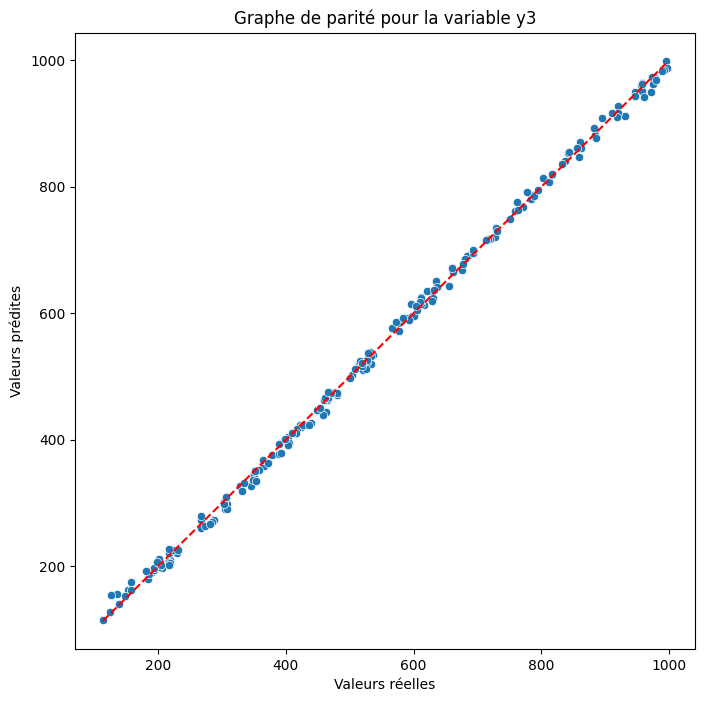

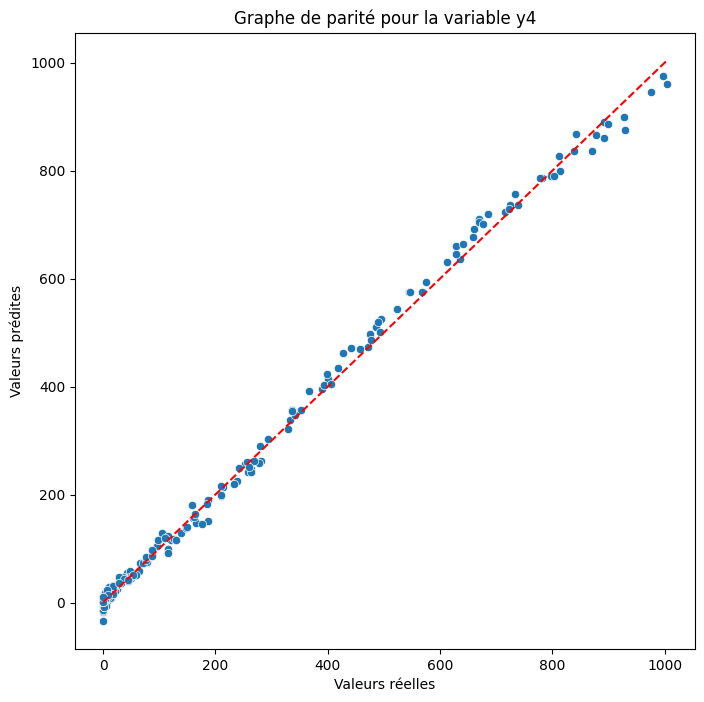

In [25]:
for i in range(len(y.columns)):
    fig = plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test_inv[:, i], y=pred_inv[:, i])
    plt.plot([min(y_test_inv[:, i]), max(y_test_inv[:, i])], [min(y_test_inv[:, i]), max(y_test_inv[:, i])], color='red', linestyle='--')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title(f'Graphe de parité pour la variable {y.columns[i]}')
    plt.show()